In [97]:
include("../../ForecastingMainNew.jl");
include("../../../LogLoss/RealRealHighDimension.jl");
using JLD2
using ITensors

# Fixed Trend, Variable Noise, Variable Frequency

Load results

In [100]:
fixed_trend = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/v1/results/difficult_noisy_sine_fixed_trend_results.jld2", "r")
f_trend_mean = read(fixed_trend, "mean_score")
f_trend_best_idx = read(fixed_trend, "best_idx")
f_trend_std = read(fixed_trend, "std_score")
tvals = read(fixed_trend, "t_vals");

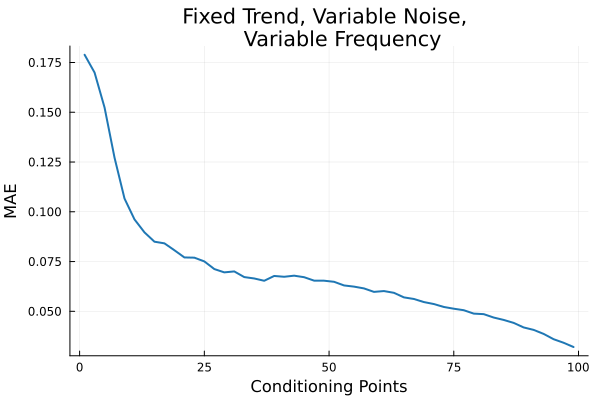

In [101]:
plot(tvals, f_trend_mean, label="", lw=2, title="Fixed Trend, Variable Noise, 
    Variable Frequency", xlabel="Conditioning Points", ylabel="MAE", c=palette(:tab10)[1])
#savefig("plots/fixed_trend_only.svg")

# Fixed frequency, variable noise, variable trend

In [103]:
fixed_freq = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/v1/results/difficult_noisy_sine_fixed_freq_results.jld2", "r")
f_freq_mean = read(fixed_freq, "mean_score")
f_freq_best_idx = read(fixed_freq, "best_idx")
f_freq_std = read(fixed_freq, "std_score");

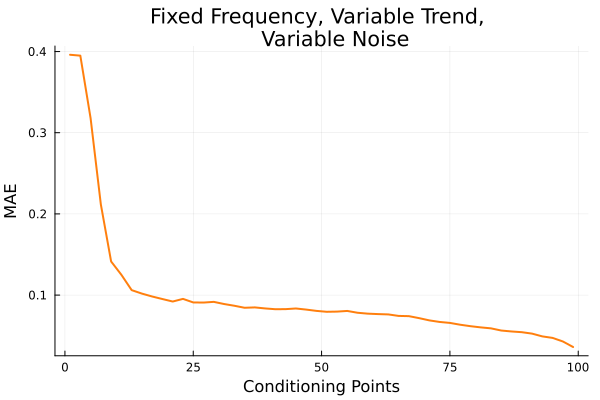

In [104]:
plot(tvals, f_freq_mean, label="", lw=2, title="Fixed Frequency, Variable Trend, 
    Variable Noise", xlabel="Conditioning Points", ylabel="MAE", c=palette(:tab10)[2])
#savefig("plots/fixed_frequency_only.svg")

# Fixed Noise, Variable Trend, Variable Frequency

In [105]:
fixed_noise = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/v1/results/difficult_noisy_sine_fixed_eta_results.jld2", "r")
f_noise_mean = read(fixed_noise, "mean_score")
f_noise_best_idx = read(fixed_noise, "best_idx")
f_noise_std = read(fixed_noise, "std_score");

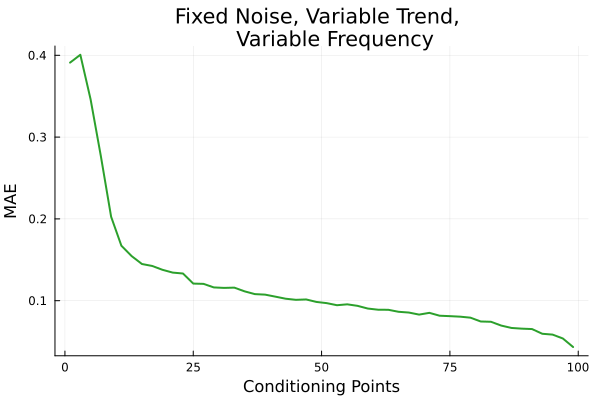

In [106]:
plot(tvals, f_noise_mean, label="", lw=2, title="Fixed Noise, Variable Trend, 
    Variable Frequency", xlabel="Conditioning Points", ylabel="MAE", c=palette(:tab10)[3])
#savefig("plots/fixed_noise_only.svg")

# All Variable

In [108]:
all_var = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/v1/difficult_noisy_sine_all_variable_results.jld2", "r")
all_var_mean = read(all_var, "mean_score")
all_var_best_idx = read(all_var, "best_idxs")
all_var_std = read(all_var, "std_score");

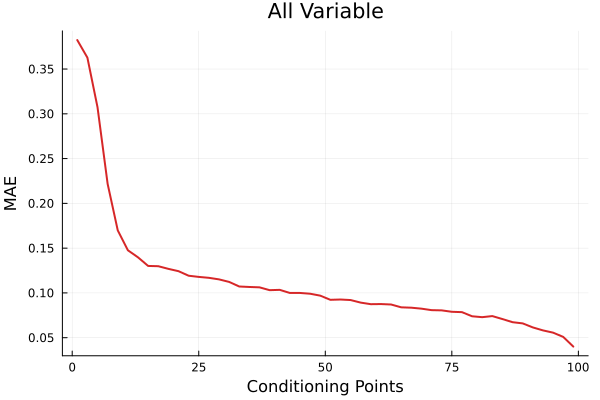

In [109]:
plot(tvals, all_var_mean, label="", lw=2, title="All Variable", xlabel="Conditioning Points",
     ylabel="MAE", c=palette(:tab10)[4])
#savefig("plots/all_variable.svg")

Overplotting all

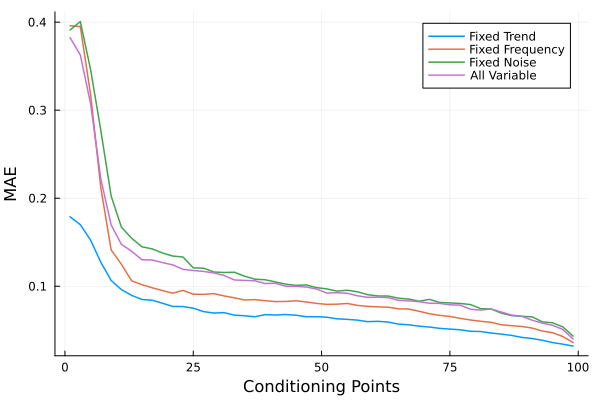

In [114]:
plot(tvals, f_trend_mean, xlabel="Conditioning Points", ylabel="MAE", label="Fixed Trend", lw=1.5)
plot!(tvals, f_freq_mean, label = "Fixed Frequency", lw=1.5)
plot!(tvals, f_noise_mean, label = "Fixed Noise", lw=1.5)
plot!(tvals, all_var_mean, label = "All Variable", lw=1.5)
#savefig("all_overplotted.svg")

In [115]:
all_var120 = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/all_variable_chi120_results.jld2", "r")
all_var_mean120 = read(all_var120, "mean_score")
all_var_best_idx120 = read(all_var120, "best_idxs")
all_var_std120 = read(all_var120, "std_score");

In [121]:
all_var_low_noise = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/v3/low_noise_results.jld2", "r")
all_var_ln_mean = read(all_var_low_noise, "mean_score");

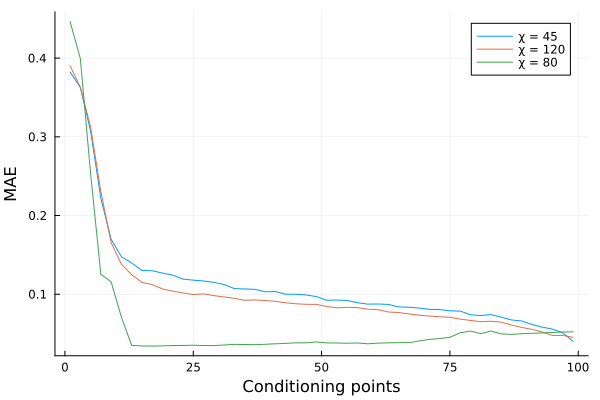

In [122]:
plot(tvals, all_var_mean, label="χ = 45", xlabel="Conditioning points", ylabel="MAE")
plot!(tvals, all_var_mean120, label = "χ = 120")
plot!(tvals, all_var_ln_mean, label= "χ = 80")

In [ ]:
# tvals = collect(1:2:99)
# mean_score = Vector{Float64}(undef, length(tvals))
# best_idxs = Vector{Vector}(undef, length(tvals))
# std_score = Vector{Float64}(undef, length(tvals))
# for (i, t) in enumerate(tvals)
#     println("Evaluating t = $t")
#     class_scores = forecast_all(fc, :directMean, (100-t); metric=:MAE);
#     best_score_idxs = sortperm(class_scores[1])[1:8]
#     best_idxs[i] = best_score_idxs
#     mean_score_class = mean(class_scores[1])
#     mean_score[i] = mean_score_class
#     std_score_class = std(class_scores[1])
#     std_score[i] = std_score_class
#     println("mean score: $mean_score_class")
# end

# Low Noise V3

In [125]:
lnv3 = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/v3/low_noise3_results.jld2", "r");
tvals = read(lnv3, "tvals")
mean_score = read(lnv3, "mean_score")
median_score = read(lnv3, "median_score")
best_idxs = read(lnv3, "best_idxs");

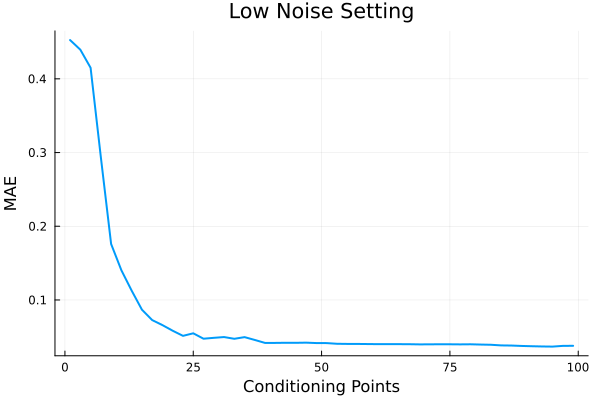

In [129]:
plot(tvals, mean_score, xlabel="Conditioning Points", ylabel="MAE", 
    title="Low Noise Setting", lw=2, label="")
#savefig("low_noise3_curve.svg")

# High Noise V3 ($\sigma = 0.4$)

In [132]:
hnv3 = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/v3/high_noise3_results.jld2", "r");
hnv3_mean_score = read(hnv3, "mean_score")
hnv3_median_score = read(hnv3, "median_score")
hnv3_best_idxs = read(hnv3, "best_idxs");

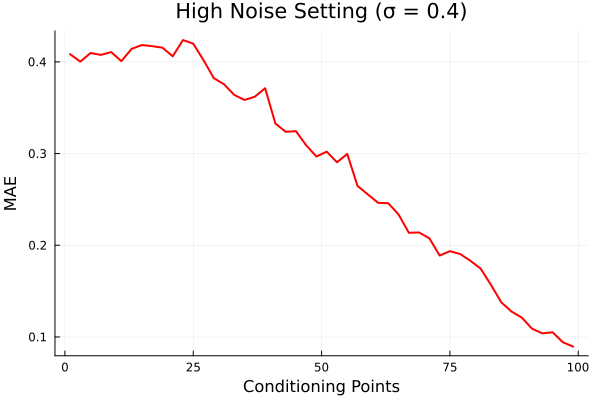

In [143]:
plot(tvals, hnv3_mean_score, lw=2, c=:red, label="", 
    xlabel="Conditioning Points", ylabel="MAE", title="High Noise Setting (σ = 0.4)")
#savefig("high_noise3_curve.svg")

# Low Noise, 3 Frequencies

In [147]:
ln3f = jldopen("/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/difficult-synthetic/v3/low_noise_3freq_results.jld2", "r")
ln3f_mean_score = read(ln3f, "mean_score")
ln3f_median_score = read(ln3f, "median_score")
ln3f_best_idxs = read(ln3f, "best_idxs");

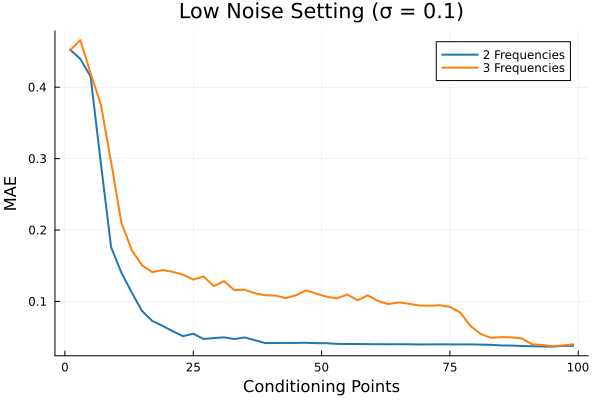

In [161]:
plot(tvals, mean_score, xlabel="Conditioning Points", ylabel = "MAE",
    title="Low Noise Setting (σ = 0.1)", lw=2, label="2 Frequencies", c=palette(:tab10)[1])
plot!(tvals, ln3f_mean_score, lw=2, label="3 Frequencies", c=palette(:tab10)[2])
#savefig("low_noise_setting_combined_curve.svg")